In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
raw_df = pd.read_csv('sph6004_assignment1_data.csv')

In [23]:
raw_df.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,32339865,2,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,35526987,2,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4


In [24]:
raw_df.describe()

,id,aki,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
count,5.092000e+04,50920.000000,50920.000000,50841.000000,50841.000000,50841.000000,50823.000000,50823.000000,50823.000000,50823.000000,...,472.000000,14689.000000,14689.000000,50685.000000,50266.000000,50407.000000,50542.000000,50685.000000,25011.000000,49900.000000
mean,3.498391e+07,1.300393,64.942008,69.902996,102.494951,84.266427,93.250232,148.234674,119.102894,47.337019,...,155.271186,470.911158,582.595412,13.702141,5.167549,3.385066,3.124471,0.205643,169.628199,81.537677
std,2.893873e+06,1.088128,17.278264,15.141810,20.481365,15.726366,17.550959,22.737214,16.375046,11.743710,...,291.000322,997.308493,1461.193067,2.649433,1.665102,2.090396,1.106433,0.404174,10.683969,36.206192
min,3.000015e+07,0.000000,18.002527,1.000000,36.000000,28.500000,0.108000,34.000000,32.000000,1.000000,...,6.000000,31.000000,31.000000,3.000000,1.000000,0.000000,1.000000,0.000000,122.000000,1.000000
25%,3.246663e+07,0.000000,54.503884,60.000000,88.000000,73.229167,83.000000,132.000000,107.470588,40.000000,...,21.000000,195.000000,203.000000,14.000000,5.000000,1.000000,3.000000,0.000000,163.000000,65.900000
50%,3.498649e+07,1.000000,66.713334,69.000000,100.000000,82.769231,92.000000,146.000000,116.925926,47.000000,...,52.000000,262.000000,277.000000,15.000000,6.000000,5.000000,4.000000,0.000000,170.000000,78.400000
75%,3.748413e+07,2.000000,78.151289,79.000000,114.000000,94.080000,103.000000,161.000000,129.093074,54.000000,...,154.250000,396.000000,437.000000,15.000000,6.000000,5.000000,4.000000,0.000000,178.000000,93.000000
max,3.999981e+07,3.000000,102.865603,167.000000,280.000000,174.740741,195.000000,357.000000,215.857143,113.000000,...,2720.000000,22890.000000,63325.000000,15.000000,6.000000,5.000000,4.000000,1.000000,226.000000,5864.000000


In [25]:
# encoding female to 0, male to 1

raw_df.loc[raw_df.gender == 'F', 'gender'] = int(0)
raw_df.loc[raw_df.gender == 'M', 'gender'] = int(1)

raw_df['gender'] = raw_df['gender'].astype(int)

In [26]:
# dropping features with > 50% missing values
missing_percentage = (raw_df.isna().sum() / len(raw_df)) * 100

# Identify features with more than 50% missing values
features_to_drop = missing_percentage[missing_percentage >= 50].index

print(len(features_to_drop))

raw_df_filtered = raw_df.drop(columns=features_to_drop)
raw_df_filtered.shape

75


(50920, 87)

In [27]:
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,11.9,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,20.0,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,12.1,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,12.8,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,10.4,11.9,27.7,39.4,15.0,NaN,0.0,1.0,1.0,97.4


In [28]:
# Imputing remaining missing values with the median values from the same class label
nan_counts_per_feature = raw_df_filtered.isna().sum(axis=0)
features_with_nan = nan_counts_per_feature[nan_counts_per_feature > 0].index.tolist()
print("NaN counts for each feature:")
print(nan_counts_per_feature)
print(features_with_nan)

NaN counts for each feature:
id                  0
aki                 0
gender              0
admission_age       0
race                0
                 ... 
gcs_motor         654
gcs_verbal        513
gcs_eyes          378
gcs_unable        235
weight_admit     1020
Length: 87, dtype: int64
['heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'mbp_min', 'mbp_max', 'mbp_mean', 'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min', 'temperature_max', 'temperature_mean', 'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_min', 'glucose_max', 'glucose_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max', 'po2_min', 'po2_max', 'pco2_min', 'pco2_max', 'baseexcess_min', 'baseexcess_max', 'totalco2_min', 'totalco2_max', 'hematocrit_min.1', 'hematocrit_max.1', 'hemoglobin_min.1', 'hemoglobin_max.1', 'platelets_min', 'platelets_max', 'wbc_min', 'wbc_max', 'aniongap_min', 'aniongap_max', 'bicarbonate_min.1', 

In [29]:
median_per_feature = raw_df_filtered[features_with_nan].median()

for feature in features_with_nan:
    raw_df_filtered[feature].fillna(median_per_feature[feature], inplace=True)

In [30]:
# checking if there are remaining nan values after imputation
nan_counts_per_feature = raw_df_filtered.isna().sum(axis=0)
print("NaN counts for each feature:")
print(nan_counts_per_feature)

NaN counts for each feature:
id               0
aki              0
gender           0
admission_age    0
race             0
                ..
gcs_motor        0
gcs_verbal       0
gcs_eyes         0
gcs_unable       0
weight_admit     0
Length: 87, dtype: int64


In [31]:
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,11.9,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,20.0,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,12.1,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,12.8,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,10.4,11.9,27.7,39.4,15.0,6.0,0.0,1.0,1.0,97.4


In [32]:
# Reducing number of race
raw_df_filtered[["race_encode"]] = 'placeholder'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('asian|indian'), "race_encode"] = 'Asian'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('black'), "race_encode"] = 'African'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('white|portuguese'), "race_encode"] = 'Caucasian'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('hispanic'), "race_encode"] = 'Hispanic'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('other|multiple|unknown|declined|unable'), "race_encode"] = 'Not Specified'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('south american'), "race_encode"] = 'South American'

In [33]:
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit,race_encode
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0,African
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0,Caucasian
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1,Caucasian
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1,Not Specified
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,11.9,27.7,39.4,15.0,6.0,0.0,1.0,1.0,97.4,Caucasian


In [34]:
raw_df_filtered.race_encode.unique()

array(['African', 'Caucasian', 'Not Specified', 'Asian', 'Hispanic',
       'South American'], dtype=object)

In [35]:
# one-hot encoding of race

raw_df_filtered = pd.get_dummies(raw_df_filtered, columns=['race_encode'])
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,gcs_verbal,gcs_eyes,gcs_unable,weight_admit,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,5.0,4.0,0.0,110.0,1,0,0,0,0,0
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,5.0,4.0,0.0,82.0,0,0,1,0,0,0
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,5.0,4.0,0.0,62.1,0,0,1,0,0,0
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,0.0,1.0,1.0,113.1,0,0,0,0,1,0
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,0.0,1.0,1.0,97.4,0,0,1,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
X = raw_df_filtered.drop(['aki', 'race'], axis=1)
y = raw_df_filtered.aki

column_list = X.columns.tolist()

# Split dataset into training set, test set, and holdout set

X_train_temp, X_holdout, y_train_temp, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_train_temp, test_size=0.22222, random_state=42) 

print(X_train.shape)
print(X_test.shape)
print(X_holdout.shape)

(35644, 91)
(10184, 91)
(5092, 91)


### Data pre-processing steps completed, ready for model training

### XGBoost model

In [38]:
from xgboost import XGBClassifier as XGBC

base_XGBC = XGBC()
base_XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_train_pred = base_XGBC.predict(X_train)
y_test_pred = base_XGBC.predict(X_test)
y_test_pred_proba = base_XGBC.predict_proba(X_test)

auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.7065926810571985


In [42]:
# Get feature importance scores
importance_scores = base_XGBC.feature_importances_

# Sort features based on importance scores
sorted_indices = importance_scores.argsort()[::-1]

feature_names = X_train.columns  # Assuming your features are in a pandas DataFrame

# Print feature importance ranking
feature_ranking = []
feature_ranking_total = []
print("Feature Importance Ranking:")
for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {feature_names[index]}: {importance_scores[index]}")
    feature_ranking.append(X.columns[index])
    feature_ranking_total.append(X.columns[index])
print(feature_ranking)

Feature Importance Ranking:
1. bun_max: 0.05328787863254547
2. gcs_verbal: 0.04868532717227936
3. weight_admit: 0.0208994522690773
4. baseexcess_min: 0.01968536153435707
5. gcs_eyes: 0.01917233318090439
6. admission_age: 0.01824096031486988
7. totalco2_max: 0.01674249768257141
8. sbp_min: 0.01562456600368023
9. ph_min: 0.015146558173000813
10. bun_min: 0.01506219431757927
11. aniongap_max: 0.014333848841488361
12. pt_max: 0.014038527384400368
13. ptt_max: 0.013276944868266582
14. spo2_min: 0.012755274772644043
15. po2_max: 0.012541011907160282
16. glucose_max: 0.012465422041714191
17. aniongap_min: 0.012395395897328854
18. gender: 0.011914469301700592
19. gcs_unable: 0.011786442250013351
20. pco2_max: 0.011327194981276989
21. po2_min: 0.01127062551677227
22. temperature_max: 0.01124599575996399
23. baseexcess_max: 0.011062762700021267
24. spo2_max: 0.010691579431295395
25. inr_max: 0.010565610602498055
26. race_encode_African: 0.010563374496996403
27. lactate_max: 0.010532907210290432


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def forward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in feature_ranking:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        
        # Check if performance improved
        if performance > best_performance:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance <= best_performance:
            selected_features.pop()
    
    return selected_features, best_performance

In [48]:
forward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, base_XGBC, roc_auc_score, max_features=12)

(['bun_max',
  'gcs_verbal',
  'weight_admit',
  'baseexcess_min',
  'gcs_eyes',
  'admission_age',
  'totalco2_max',
  'sbp_min',
  'ph_min',
  'bun_min',
  'aniongap_max',
  'pt_max'],
 0.6862940732201753)

In [49]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = feature_ranking
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
    for i in range(len(feature_ranking)-1):
        # if i == 0:
        #     model.fit(X, y) 
        #     y_pred = model.predict(X_test)
        #     performance = metric(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
        #     if performance > best_performance:
        #         best_performance = performance
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        if best_performance - performance < 0.004:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break
    
    return selected_features, best_performance

In [50]:
backward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, base_XGBC, roc_auc_score)

(['bun_max',
  'gcs_verbal',
  'weight_admit',
  'baseexcess_min',
  'gcs_eyes',
  'admission_age',
  'totalco2_max',
  'sbp_min',
  'ph_min',
  'bun_min',
  'aniongap_max',
  'pt_max',
  'ptt_max',
  'spo2_min',
  'po2_max'],
 0.6937943990650689)

In [52]:
forward_features = ['bun_max',
  'gcs_verbal',
  'weight_admit',
  'baseexcess_min',
  'gcs_eyes',
  'admission_age',
  'totalco2_max',
  'sbp_min',
  'ph_min',
  'bun_min',
  'aniongap_max',
  'pt_max']

backward_features = ['bun_max',
  'gcs_verbal',
  'weight_admit',
  'baseexcess_min',
  'gcs_eyes',
  'admission_age',
  'totalco2_max',
  'sbp_min',
  'ph_min',
  'bun_min',
  'aniongap_max',
  'pt_max',
  'ptt_max',
  'spo2_min',
  'po2_max']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in feature_ranking_total]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in feature_ranking_total]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
import numpy as np
from geneal.genetic_algorithms import BinaryGenAlgSolver

class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        # Assuming X_train and y_train are your training data and labels
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        X_train_subset = X_train[selected_features_list]

    
        base_XGBC.fit(X_train_subset, y_train)

       
        X_test_subset = X_test[selected_features_list]

        
        y_pred_proba = base_XGBC.predict_proba(X_test_subset)

    
        auroc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

        return auroc
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    #def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

Iteration: 2
Best fitness: 0.7073215268451409
Iteration: 4
Best fitness: 0.7075564605204985
Iteration: 6
Best fitness: 0.7090516300222977
Iteration: 8
Best fitness: 0.7090516300222977
Iteration: 10
Best fitness: 0.709346429603291
Iteration: 12
Best fitness: 0.709346429603291
Iteration: 14
Best fitness: 0.709346429603291
Iteration: 16
Best fitness: 0.7093861293310074
Iteration: 18
Best fitness: 0.7093861293310074
Iteration: 20
Best fitness: 0.7093861293310074


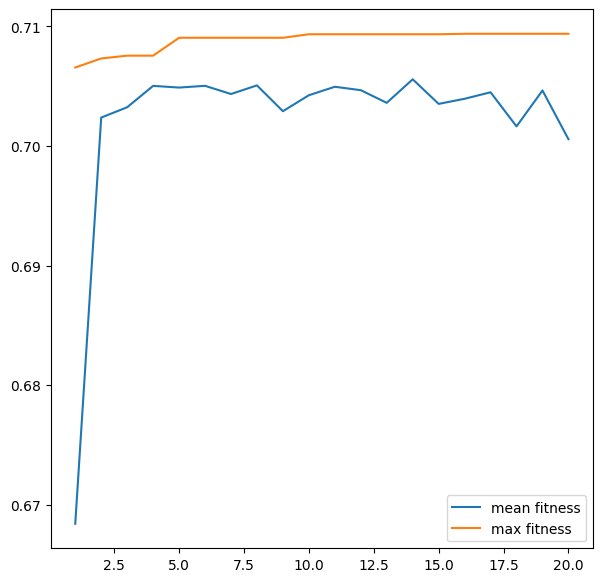


#############################
#			STATS			#
#############################


Total running time: 4 minutes, 12 seconds


Population size: 10
Number variables: 91
Selection rate: 0.25
Mutation rate: 0.1
Number Generations: 20

Best fitness: 0.7093861293310074
Best individual: [0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
None


In [57]:
solver = MyBinaryGenAlgSolver(pop_size=10, n_genes=91, mutation_rate=0.1, max_gen=20, selection_rate=0.25)
best_solution = solver.solve()
print(best_solution)

In [58]:
Best_individual = [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,]


selected_features = [feature_ranking_total[i] for i, value in enumerate(Best_individual) if value == 1]
print(selected_features)

['gcs_verbal', 'weight_admit', 'gcs_eyes', 'totalco2_max', 'sbp_min', 'ph_min', 'pt_max', 'spo2_min', 'po2_max', 'glucose_max', 'aniongap_min', 'pco2_max', 'po2_min', 'temperature_max', 'baseexcess_max', 'inr_max', 'race_encode_African', 'dbp_min', 'race_encode_Asian', 'potassium_max.1', 'gcs_motor', 'pt_min', 'hemoglobin_min.1', 'sbp_max', 'abs_lymphocytes_min', 'dbp_mean', 'abs_lymphocytes_max', 'lactate_min', 'mbp_max', 'mbp_mean', 'resp_rate_mean', 'temperature_min', 'hemoglobin_max.1', 'abs_neutrophils_max', 'wbc_max', 'hematocrit_min.1', 'spo2_mean', 'platelets_max', 'pco2_min', 'hematocrit_max.1', 'sbp_mean', 'resp_rate_min', 'heart_rate_mean', 'abs_neutrophils_min', 'abs_monocytes_max', 'abs_basophils_min', 'sodium_min.1', 'race_encode_Caucasian', 'abs_basophils_max', 'bicarbonate_max.1', 'chloride_min.1', 'heart_rate_min', 'dbp_max', 'sodium_max.1', 'abs_monocytes_min', 'potassium_min.1', 'wbc_min', 'totalco2_min', 'id', 'calcium_max.1', 'race_encode_Not Specified', 'race_enco

In [59]:
# Reducing feature dimension of train and test data after genetic algorithm feature selection

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [60]:
# XGBC model with selected features

base_XGBC.fit(X_train_selected, y_train)

y_train_pred = base_XGBC.predict(X_train_selected)
y_test_pred = base_XGBC.predict(X_test_selected)
y_test_pred_proba = base_XGBC.predict_proba(X_test_selected)

In [61]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79     11797
           1       0.93      0.49      0.64      6872
           2       0.71      0.84      0.77     11444
           3       0.92      0.72      0.81      5531

    accuracy                           0.77     35644
   macro avg       0.82      0.73      0.75     35644
weighted avg       0.79      0.77      0.76     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58      3339
           1       0.22      0.06      0.10      1961
           2       0.44      0.57      0.49      3296
           3       0.47      0.35      0.40      1588

    accuracy                           0.46     10184
   macro avg       0.41      0.41      0.39     10184
weighted avg       0.43      0.46      0.43     10184



In [63]:
auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.6881860700455744


In [64]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79     11797
           1       0.93      0.49      0.64      6872
           2       0.71      0.84      0.77     11444
           3       0.92      0.72      0.81      5531

    accuracy                           0.77     35644
   macro avg       0.82      0.73      0.75     35644
weighted avg       0.79      0.77      0.76     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58      3339
           1       0.22      0.06      0.10      1961
           2       0.44      0.57      0.49      3296
           3       0.47      0.35      0.40      1588

    accuracy                           0.46     10184
   macro avg       0.41      0.41      0.39     10184
weighted avg       0.43      0.46      0.43     10184



In [65]:
parameters = {
    'n_estimators':np.arange(start=4,stop=20,step=3),
    'max_depth':np.arange(start=3,stop=6,step=1),
    'learning_rate':np.arange(start=0.1,stop=0.4,step=0.1)
}

parameters

{'n_estimators': array([ 4,  7, 10, 13, 16, 19]),
 'max_depth': array([3, 4, 5]),
 'learning_rate': array([0.1, 0.2, 0.3, 0.4])}

In [66]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [71]:
stratifiedCV = StratifiedKFold(n_splits=5)
# XGBC: XGBoost classifier
XGBoostModel = XGBC()
BestXGBoost = GridSearchCV(
    XGBoostModel,
    param_grid=parameters,
    scoring='roc_auc_ovr',
    cv=stratifiedCV,
    #verbose=1,
    #n_jobs=-1 # use all cpu cores to speedup grid search
)
BestXGBoost.fit(X_train_selected,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4]),
                         'max_depth': array([3, 4, 5]),
                         'n_estimators': array([ 4,  7, 10, 13, 16, 19])},
             scoring='roc_auc_ovr')

In [72]:
BestXGBoost.best_params_

{'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 19}

In [73]:
BestXGBoost.best_score_

0.6923437494674618

In [74]:
y_train_pred = BestXGBoost.predict(X_train_selected)
y_test_pred = BestXGBoost.predict(X_test_selected)
y_holdout_pred = BestXGBoost.predict(X_holdout[selected_features])

y_holdout_proba_pred = BestXGBoost.predict_proba(X_holdout[selected_features])
roc_auc_score(y_holdout, y_holdout_proba_pred, multi_class='ovr', average='macro')

0.6897524638216451

In [75]:
y_test_proba_pred = BestXGBoost.predict_proba(X_test_selected)
roc_auc_score(y_test, y_test_proba_pred, multi_class='ovr', average='macro')

0.6909857290540596

In [76]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.56      0.74      0.64     11797
           1       0.70      0.08      0.14      6872
           2       0.49      0.68      0.57     11444
           3       0.63      0.40      0.49      5531

    accuracy                           0.54     35644
   macro avg       0.60      0.47      0.46     35644
weighted avg       0.58      0.54      0.50     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.68      0.59      3339
           1       0.26      0.02      0.04      1961
           2       0.44      0.59      0.50      3296
           3       0.50      0.33      0.40      1588

    accuracy                           0.47     10184
   macro avg       0.43      0.41      0.38     10184
weighted avg       0.44      0.47      0.43     10184



### SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smote_sampler = SMOTE(random_state=12,sampling_strategy='auto')
X_df_SMOTE, y_df_SMOTE = smote_sampler.fit_resample(X_train_selected, y_train)

In [80]:
y_train.value_counts()

0    11797
2    11444
1     6872
3     5531
Name: aki, dtype: int64

In [81]:
y_df_SMOTE.value_counts()

3    11797
1    11797
0    11797
2    11797
Name: aki, dtype: int64

In [82]:
XGBC_best = XGBC(
    learning_rate = 0.4,
    max_depth=5, 
    n_estimators=19,
    random_state=40, 
)


XGBC_SMOTE = XGBC_best.fit(X_df_SMOTE, y_df_SMOTE)

In [83]:
y_train_pred = XGBC_SMOTE.predict(X_df_SMOTE)
y_test_pred = XGBC_SMOTE.predict(X_test_selected)
y_holdout_pred = XGBC_SMOTE.predict(X_holdout[selected_features])

print(confusion_matrix(y_df_SMOTE, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))
print(confusion_matrix(y_holdout, y_holdout_pred))

[[8116  693 2472  516]
 [2672 4778 2570 1777]
 [2831  845 6698 1423]
 [ 881 1178 1962 7776]]
[[2149  253  784  153]
 [ 774  186  780  221]
 [ 921  256 1650  469]
 [ 273   50  586  679]]
[[1088  135  429   72]
 [ 415  105  380  105]
 [ 456  120  761  211]
 [ 133   35  313  334]]


In [84]:
print("Train Accuracy:\n", classification_report(y_df_SMOTE, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.56      0.69      0.62     11797
           1       0.64      0.41      0.50     11797
           2       0.49      0.57      0.53     11797
           3       0.68      0.66      0.67     11797

    accuracy                           0.58     47188
   macro avg       0.59      0.58      0.58     47188
weighted avg       0.59      0.58      0.58     47188



Test Accuracy:
               precision    recall  f1-score   support

           0       0.52      0.64      0.58      3339
           1       0.25      0.09      0.14      1961
           2       0.43      0.50      0.47      3296
           3       0.45      0.43      0.44      1588

    accuracy                           0.46     10184
   macro avg       0.41      0.42      0.40     10184
weighted avg       0.43      0.46      0.43     10184



External Test Accuracy:
               precision    recall  f1-score   support

           0 

In [85]:
y_test_proba_pred = XGBC_SMOTE.predict_proba(X_test_selected)
roc_auc_score(y_test, y_test_proba_pred, multi_class='ovr', average='macro')

0.6886352857344586